In [40]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
Emp_data=pd.read_csv(r"C:\Users\ASHISH PAL\Downloads\Dataset01-Employee_Attrition.csv")

In [4]:
Emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


we have to check that employee is stay with the company or not 
so target variable is 'Left'

In [6]:
Emp_data.shape

(14999, 10)

In [7]:
Emp_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
Emp_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Therefore there are two categorical var

In [10]:
Emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Chech for duplicates

In [12]:
Emp_data[Emp_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Drop duplicates

In [15]:
Emp_data1=Emp_data.drop_duplicates()
Emp_data1.shape

(11991, 10)

check for missing value 

In [17]:
Emp_data1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

Data exploration and visualization


In [18]:
Emp_data1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

<Axes: xlabel='left'>

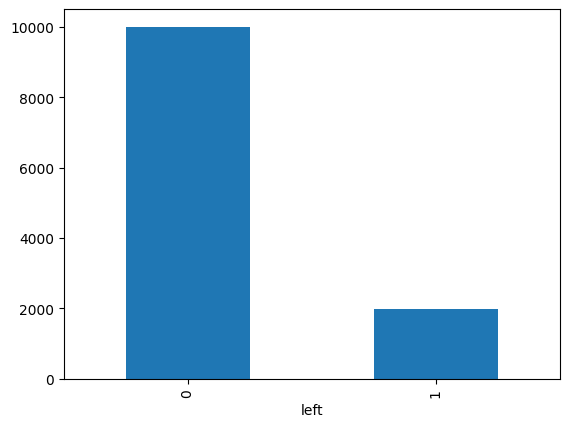

In [19]:
Emp_data1['left'].value_counts().plot(kind='bar')

0 means the employee stay with company 
1 means the employee leave the company 

so therefore data is imbalanced

In [21]:
Emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Impact of salary on employee retention

In [22]:
pd.crosstab(Emp_data1.salary,Emp_data1.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


<Axes: xlabel='salary'>

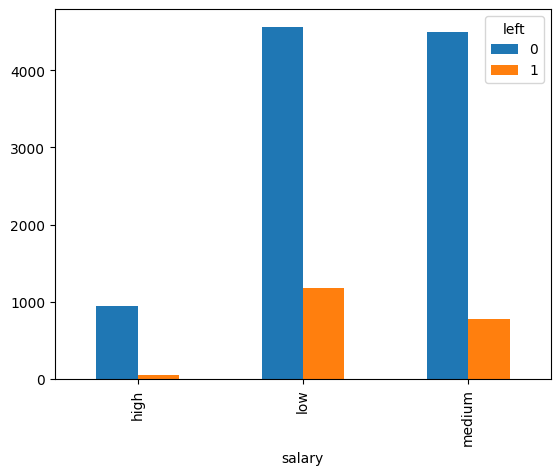

In [23]:
pd.crosstab(Emp_data1.salary,Emp_data1.left).plot(kind='bar')

Above bar chart shows employees with high salary are likely to not leave the company

### Department wise employee retention rate

<Axes: xlabel='Department'>

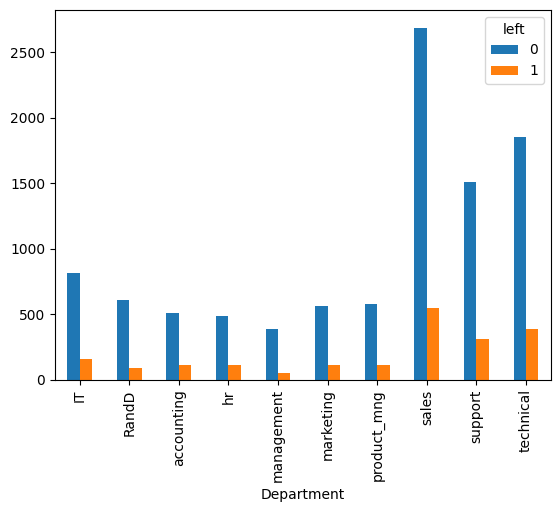

In [25]:
pd.crosstab(Emp_data1.Department,Emp_data1.left).plot(kind='bar')

In [26]:
pd.crosstab(Emp_data1.Department,Emp_data1.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


In [27]:
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
                     'average_montly_hours', 'time_spend_company', 
                     'Work_accident', 'left', 'promotion_last_5years']

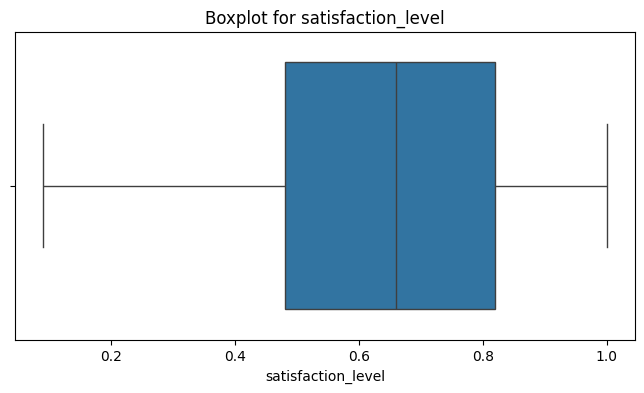

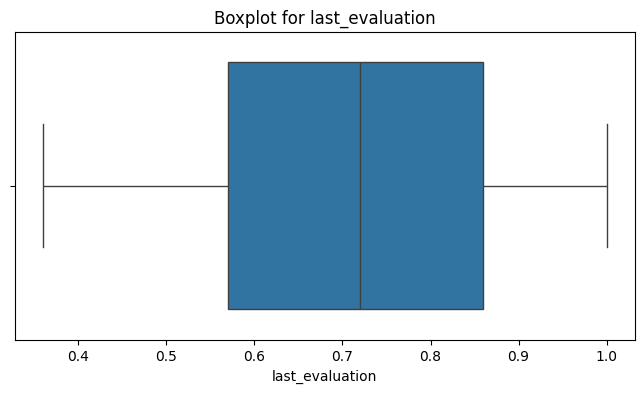

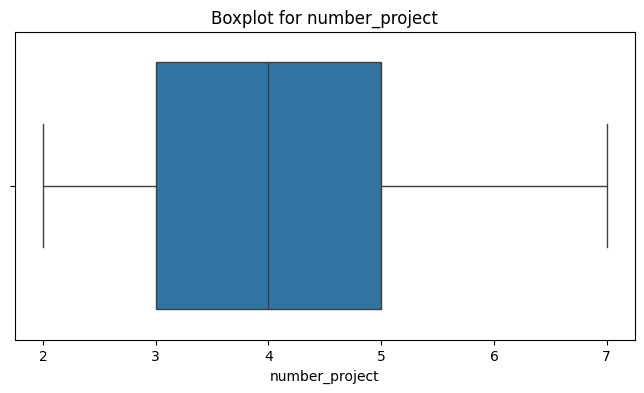

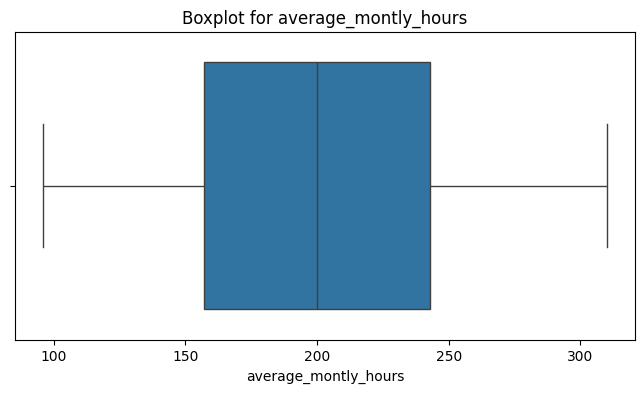

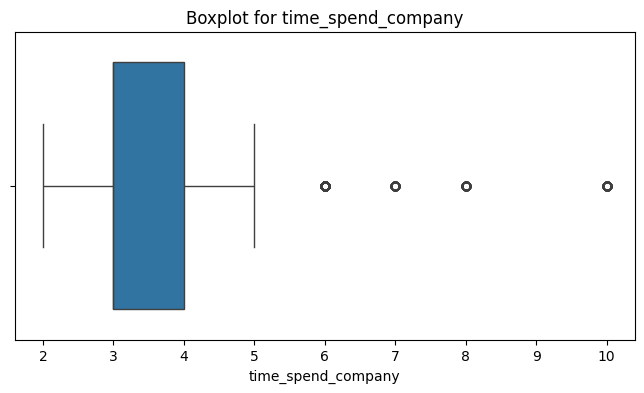

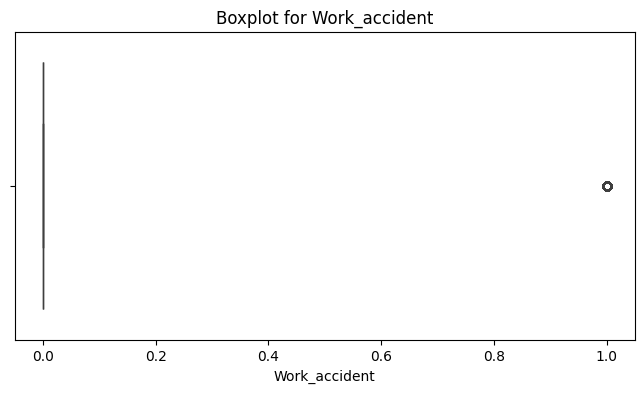

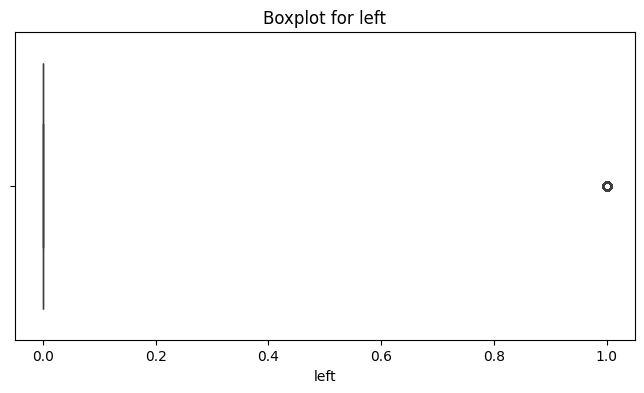

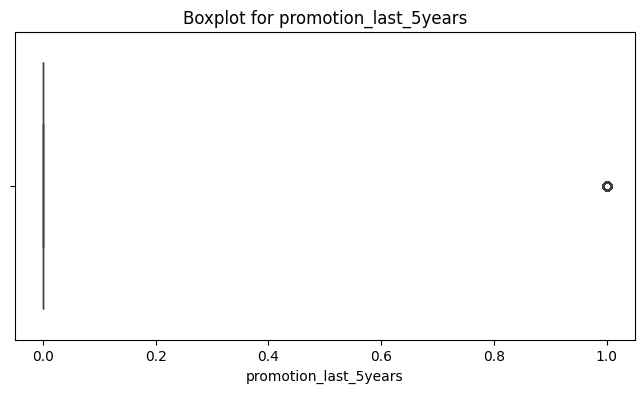

In [29]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=Emp_data1[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

## Feature ENG

In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [41]:
Emp_data1['salary']=label_encoder.fit_transform(Emp_data1['salary'])
Emp_data1['Department']=label_encoder.fit_transform(Emp_data1['Department'])

In [42]:
Emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


### Dependent (Target) and Independent Variable

In [43]:
X=Emp_data1.drop('left',axis=1)
Y=Emp_data1['left']

### spliting data into training and testing

In [49]:
from sklearn.model_selection import train_test_split   # random spliting the data into training and testig the data 

#split the data into test and train 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,
                                              random_state=10)

In [50]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(9592, 9)
(9592,)
(2399, 9)
(2399,)


### Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
std_scaler = StandardScaler()


In [56]:
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)


In [57]:
X_train_scaled

array([[ 0.41094825, -0.16057104, -0.69378845, ..., -0.12941381,
         0.38246997, -0.57152066],
       [ 0.57680945, -1.76401539,  0.1689052 , ..., -0.12941381,
         0.38246997, -0.57152066],
       [ 0.94999713,  0.01758945, -0.69378845, ..., -0.12941381,
         0.38246997, -0.57152066],
       ...,
       [-2.20136554,  1.44287332,  1.8942925 , ..., -0.12941381,
         0.72981441,  1.01839412],
       [-0.16956592, -0.21995786,  1.03159885, ..., -0.12941381,
         0.72981441,  1.01839412],
       [-2.20136554,  1.08655235,  1.8942925 , ..., -0.12941381,
        -1.70159665, -0.57152066]])

In [58]:
X_test_scaled

array([[ 0.03776057,  0.37391042,  1.03159885, ..., -0.12941381,
         0.38246997, -0.57152066],
       [ 0.86706654, -1.11076028, -0.69378845, ..., -0.12941381,
        -0.3122189 ,  1.01839412],
       [ 0.03776057, -0.99198663, -0.69378845, ...,  7.72715088,
        -0.3122189 , -2.16143544],
       ...,
       [-0.8330107 , -1.22953394,  1.03159885, ..., -0.12941381,
         0.03512553,  1.01839412],
       [ 1.48904601,  1.32409966, -0.69378845, ..., -0.12941381,
        -2.04894109, -2.16143544],
       [-0.29396182,  0.78961821, -0.69378845, ..., -0.12941381,
        -0.65956334, -0.57152066]])

## Model Deployment

### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
RDM=RandomForestClassifier()

#### model training

In [61]:
RDM.fit(X_train_scaled,Y_train)

RandomForestClassifier()

### Model Prediction

In [66]:
Y_pred=RDM.predict(X_test_scaled)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[1980    4]
 [  29  386]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1984
           1       0.99      0.93      0.96       415

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.98      2399
weighted avg       0.99      0.99      0.99      2399

Accuracy of the model:  0.9862442684451855


In [70]:
# Assuming RDM is your trained Random Forest model and X is your feature set
score_list = RDM.feature_importances_
list_of_features = list(X.columns)

# Creating a DataFrame with Feature names and their corresponding importance scores
score_df = pd.DataFrame({
    'Feature': list_of_features,
    'Score': score_list
})

# Sorting the DataFrame by the importance score in descending order
score_df = score_df.sort_values(by='Score', ascending=False)

# Display the sorted DataFrame
print(score_df)


                 Feature     Score
0     satisfaction_level  0.346834
2         number_project  0.170760
4     time_spend_company  0.167622
3   average_montly_hours  0.160497
1        last_evaluation  0.126082
7             Department  0.012982
8                 salary  0.007412
5          Work_accident  0.006728
6  promotion_last_5years  0.001083


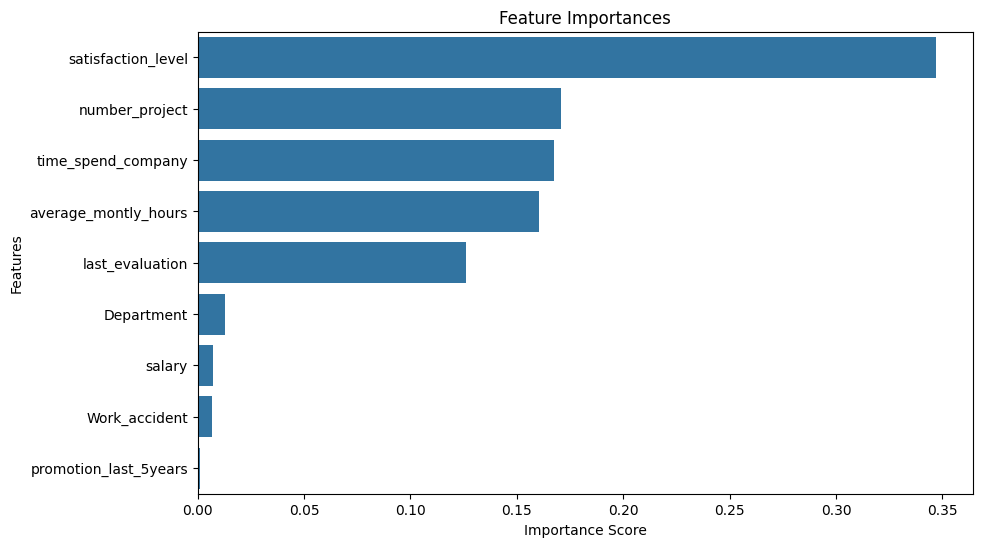

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=score_df)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

### k-fold 

In [72]:
from sklearn.model_selection import cross_val_score

In [74]:
scores=cross_val_score(RDM,X_train_scaled,Y_train,cv=5,scoring='accuracy')
print('cross-calidation scores =',scores)

cross-calidation scores = [0.98384575 0.98645128 0.98331595 0.98540146 0.97914494]


In [75]:
Avg_model_score=scores.mean()
print('Average Model Score =',Avg_model_score)

Average Model Score = 0.9836318772648902


### Hyper Paramter Tunning

## Grid search cv | Random search cv

In [76]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

### List of Parameters

In [77]:
parameters={
    'n_estimators':[50,100],
    'max_features':['sqrt','log2',None]
    
}

In [78]:
grid_search = GridSearchCV(estimator = RDM, 
                           param_grid = parameters)

grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [79]:
# Best parameters:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [80]:
# Building New model with best parameters:
Random_forest_model_new = RandomForestClassifier(max_features='sqrt', n_estimators=50)

Random_forest_model_new.fit(X_train_scaled, Y_train)

RandomForestClassifier(n_estimators=50)

### # K fold Cross validations: K=5

In [82]:
# K fold Cross validations: K=5
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_forest_model_new, X_train_scaled, Y_train, cv=5, scoring='accuracy')
print('Cross-validation scores =', scores)

Cross-validation scores = [0.98384575 0.98645128 0.98331595 0.98592284 0.97966632]


In [83]:
# Average Accuracy Score of Cross Validation:
Avg_Model_score = scores.mean()
print('Average Model Score =', Avg_Model_score)

Average Model Score = 0.9838404278384043
